In [10]:
import requests
import json
import pandas as pd
import numpy as np
import fiona
import descartes
from shapely.geometry import Point, Polygon
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import copy
import seaborn as sns 
%matplotlib inline

import nltk
import string
import nltk.stem
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk.stem
from PIL import Image
import sys
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('punkt')
import gensim
from gensim.models import Phrases
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sea
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import re
import pyLDAvis
import pyLDAvis.gensim 

[nltk_data] Downloading package punkt to /Users/yanxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Text Cleaning

In [13]:
review=pd.read_csv("review_text.csv")
review=review.drop('Unnamed: 0', axis=1)
review.rating= pd.to_numeric(review.rating, errors='coerce')
review.head()

,Review_ID,text,rating,time,Business_ID,type,ratings,geo_id,geometry
0,3berq4jHTbnJExYCloPJtA,"Tim is awesome, educated, charismatic, and fun...",5.0,2017-06-09 10:57:21,mMxsS8Y6bv0zCRJpFAhbEA,Education,5.0,41051005000,POINT (-122.687461853027 45.5287284851074)
1,i8KATzD28BBplS_vXPp94A,I am a brand new actor with my only on-camera ...,5.0,2014-05-14 19:25:28,mMxsS8Y6bv0zCRJpFAhbEA,Education,5.0,41051005000,POINT (-122.687461853027 45.5287284851074)
2,r00ER6z9bS3Mmhabp1Om6g,My daughter decided that she wanted to get int...,5.0,2017-11-13 09:28:56,19mIUTnqfUQUu6TguP_6Ng,Education,5.0,41051005000,POINT (-122.6879303 45.5266776)
3,FnH40b4lFXxvHiAaLXur8Q,Both my daughters have taken weekly classes an...,5.0,2017-01-31 19:26:20,19mIUTnqfUQUu6TguP_6Ng,Education,5.0,41051005000,POINT (-122.6879303 45.5266776)
4,F1o2s5zP2BtwvEuSr2mSzg,Barbara's acting class and one on one training...,5.0,2017-11-01 16:01:04,j0TR9ZTc4HhwhaNDBwWlrA,Education,5.0,41051005000,POINT (-122.688015 45.526672)


In [37]:
set(review.code)

{"12:'Mining, Quarrying, and Oil and Gas Extraction'",
 "23:'Construction'",
 "31:'Manufacturing'",
 "42:'Wholesale Trade'",
 "44:'Retail Trade",
 "44:'Retail Trade'",
 "45:'Retail Trade'",
 "48:'Transportation and Warehousing'",
 "49:'Transportation and Warehousing'",
 "51:'Information'",
 "52:'Finance and Insurance'",
 "53:'Real Estate and Rental and Leasing'",
 "55:'Management of Companies and Enterprises'",
 "61:'Educational Services'",
 "62:'Health Care and Social Assistance'"}

In [16]:
for i in range(len(review)):
    if review['type'][i] == 'Arts_Entertainment':  
        review['code'][i] ="55:'Management of Companies and Enterprises'"
    if review['type'][i] == 'Beauty&Spa':  
        review['code'][i] ="44:'Retail Trade"
    if review['type'][i] == 'Car':  
        review['code'][i] ="49:'Transportation and Warehousing'"
    if review['type'][i] == 'Education':  
        review['code'][i] ="61:'Educational Services'"
    if review['type'][i] == 'Financial':  
        review['code'][i] ="52:'Finance and Insurance'"
    if review['type'][i] == 'Nightlife':  
        review['code'][i] ="45:'Retail Trade'"
    if review['type'][i] == 'Pets':  
        review['code'][i] ="44:'Retail Trade'"
    if review['type'][i] == 'Shopping':  
        review['code'][i] ="31:'Manufacturing'"
    if review['type'][i] == 'bicycles':  
        review['code'][i] ="48:'Transportation and Warehousing'"
    if review['type'][i] == 'grocery':  
        review['code'][i] ="42:'Wholesale Trade'"
    if review['type'][i] == 'hotel':  
        review['code'][i] ="53:'Real Estate and Rental and Leasing'"
    if review['type'][i] == 'restaurant':  
        review['code'][i] ="44:'Retail Trade'"
    if review['type'][i] == 'Construction':  
        review['code'][i] ="23:'Construction'"
    if review['type'][i] == 'Oil':  
        review['code'][i] ="12:'Mining, Quarrying, and Oil and Gas Extraction'"
    if review['type'][i] == 'healthcare':  
        review['code'][i] ="62:'Health Care and Social Assistance'"
    if review['type'][i] == 'Information':  
        review['code'][i] ="51:'Information'"
    if review['type'][i] == 'Manufacturing':  
        review['code'][i] ="31:'Manufacturing'"
    else:
        continue

/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import

In [18]:
### by types
R_type=review[['geo_id','text','rating','ratings','type','code']]
R_type.head()

,geo_id,text,rating,ratings,type,code
0,41051005000,"Tim is awesome, educated, charismatic, and fun...",5.0,5.0,Education,61:'Educational Services'
1,41051005000,I am a brand new actor with my only on-camera ...,5.0,5.0,Education,61:'Educational Services'
2,41051005000,My daughter decided that she wanted to get int...,5.0,5.0,Education,61:'Educational Services'
3,41051005000,Both my daughters have taken weekly classes an...,5.0,5.0,Education,61:'Educational Services'
4,41051005000,Barbara's acting class and one on one training...,5.0,5.0,Education,61:'Educational Services'


In [40]:
## data cleaning and get text phrases
text = R_type.text.values.tolist()
text = [re.sub('\s+', ' ', sent) for sent in text]
data = [re.sub("\'", "", sent) for sent in text]

def all_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(all_words(data))

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-40-e7639d0981ba>:3: DeprecationWarning: invalid escape sequence \s
  text = [re.sub('\s+', ' ', sent) for sent in text]


In [41]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','come','order','try','go',
                   'get','make','drink','plate','dish','restaurant','place','would',
                   'really','like','great','service','came','got','place','time','got',
                   'get','would','go','even','portland','one','first','day','area',
                    'year','went','look','help','alway','could','almost','several','many',
                  'always','years','came','really','location','hours','experience'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

### LDA Modeling

In [105]:
## generate corpus
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [106]:
### This step will cost some time
coherence_score = []
for i in range(5,16):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    coherence_model_lda = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_score.append(coherence_lda)

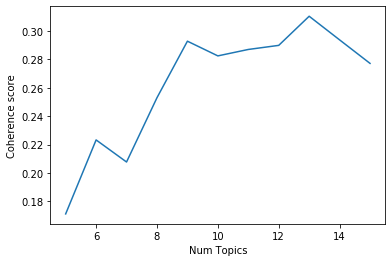

In [107]:
num_topic = [i for i in range(5,16)]

plt.plot(num_topic, coherence_score)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [108]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics = 13, 
                                           random_state = 100, update_every = 1, chunksize = 100,
                                           passes = 10, alpha = 'auto', per_word_topics = True)
lda_model.print_topics()

[(0,
  '0.067*"friendly" + 0.058*"car" + 0.042*"staff" + 0.039*"job" + 0.032*"done" + 0.031*"business" + 0.029*"made" + 0.027*"guys" + 0.025*"said" + 0.023*"fast"'),
 (1,
  '0.130*"called" + 0.088*"find" + 0.062*"working" + 0.051*"stopped" + 0.046*"feel" + 0.031*"beautiful" + 0.026*"owners" + 0.025*"breakfast" + 0.022*"afternoon" + 0.021*"event"'),
 (2,
  '0.099*"back" + 0.062*"took" + 0.056*"long" + 0.043*"excellent" + 0.032*"recently" + 0.031*"quick" + 0.025*"walked" + 0.024*"kids" + 0.024*"door" + 0.021*"life"'),
 (3,
  '0.059*"best" + 0.039*"us" + 0.036*"times" + 0.034*"little" + 0.030*"two" + 0.027*"much" + 0.021*"pizza" + 0.018*"mexican" + 0.016*"gave" + 0.016*"awesome"'),
 (4,
  '0.045*"need" + 0.043*"shop" + 0.042*"old" + 0.034*"give" + 0.028*"stars" + 0.028*"recommend" + 0.023*"saturday" + 0.023*"kind" + 0.022*"night" + 0.020*"full"'),
 (5,
  '0.087*"food" + 0.061*"ive" + 0.040*"amazing" + 0.040*"nice" + 0.027*"take" + 0.025*"super" + 0.022*"also" + 0.021*"house" + 0.020*"ever

### Sentiment Score

In [19]:
sid = SentimentIntensityAnalyzer()
R_type['sentiments'] = R_type['text'].apply(lambda x: sid.polarity_scores(x))
R_type = pd.concat([R_type.drop(['sentiments'], axis=1), R_type['sentiments'].apply(pd.Series)], axis=1)
R_type['sent'] = np.where(R_type['compound'] >= 0, 'positive', 'negative')
R_type.rename({'compound': 'sentiment_score','rating':'star_score'}, axis=1, inplace=True)
R_type['sent_val'] = np.where(R_type['sent'] == 'positive', 1, 0)

/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
R_type.head()

,geo_id,text,star_score,ratings,type,code,neg,neu,pos,sentiment_score,sent,sent_val
0,41051005000,"Tim is awesome, educated, charismatic, and fun...",5.0,5.0,Education,61:'Educational Services',0.000,0.532,0.468,0.9060,positive,1
1,41051005000,I am a brand new actor with my only on-camera ...,5.0,5.0,Education,61:'Educational Services',0.000,1.000,0.000,0.0000,positive,1
2,41051005000,My daughter decided that she wanted to get int...,5.0,5.0,Education,61:'Educational Services',0.094,0.906,0.000,-0.3612,negative,0
3,41051005000,Both my daughters have taken weekly classes an...,5.0,5.0,Education,61:'Educational Services',0.049,0.951,0.000,-0.0772,negative,0
4,41051005000,Barbara's acting class and one on one training...,5.0,5.0,Education,61:'Educational Services',0.000,0.767,0.233,0.7845,positive,1


In [21]:
R_type['rating_scores'] = R_type.ratings.apply(lambda x: 1 if x > 4.0 else(-1 if x<3.0 else 0))

In [35]:
test=R_type[['geo_id','type','code','sentiment_score','star_score','ratings']]
sentiment_avg=test.groupby(['geo_id','code']).mean()
sentiment_avg[0:12]

sentiment_score  \
geo_id      code                                                            
41051000100 31:'Manufacturing'                                   0.581345   
            42:'Wholesale Trade'                                 0.423100   
            44:'Retail Trade                                     0.553555   
            44:'Retail Trade'                                    0.565990   
            45:'Retail Trade'                                    0.557647   
            48:'Transportation and Warehousing'                  0.212417   
            49:'Transportation and Warehousing'                  0.408414   
            52:'Finance and Insurance'                           0.370267   
            55:'Management of Companies and Enterprises'         0.479910   
            61:'Educational Services'                            0.382446   
            62:'Health Care and Social Assistance'               0.062817   
41051000200 31:'Manufacturing'                                   0.546205   

                                                          star_score   ratings  
geo_id      code                                                                
41051000100 31:'Manufacturing'                              4.509434  4.358491  
            42:'Wholesale Trade'                            4.333333  4.083333  
            44:'Retail Trade                                4.575758  4.772727  
            44:'Retail Trade'                               4.414815  4.222222  
            45:'Retail Trade'                               4.200000  4.100000  
            48:'Transportation and Warehousing'             4.833333  4.500000  
            49:'Transportation and Warehousing'             5.000000  4.142857  
            52:'Finance and Insurance'                      3.818182  4.083333  
            55:'Management of Companies and Enterprises'    4.050000  4.275000  
            61:'Educational Services'                       4.153846  4.192308  
            62:'Health Care and Social Assistance'          3.000000  3.500000  
41051000200 31:'Manufacturing'                              4.750000  4.700000

In [36]:
sentiment_avg.to_csv('total_score.csv')

In [24]:
df=R_type[['geo_id','code','sentiment_score']]
sentiment_score=df.groupby(['geo_id','code']).mean().unstack().fillna(0)
sentiment_score.columns = sentiment_score.columns.droplevel()
sentiment_score

code,"12:'Mining, Quarrying, and Oil and Gas Extraction'",23:'Construction',31:'Manufacturing',42:'Wholesale Trade',44:'Retail Trade,44:'Retail Trade',45:'Retail Trade',48:'Transportation and Warehousing',49:'Transportation and Warehousing',51:'Information',52:'Finance and Insurance',53:'Real Estate and Rental and Leasing',55:'Management of Companies and Enterprises',61:'Educational Services',62:'Health Care and Social Assistance'
geo_id,,,,,,,,,,,,,,,
41051000100,0.000000,0.000000,0.581345,0.423100,0.553555,0.565990,0.557647,0.212417,0.408414,0.000000,0.370267,0.000000,0.479910,0.382446,0.062817
41051000200,0.000000,0.000000,0.546205,0.138017,0.520100,0.467216,0.089467,0.000000,0.303358,0.000000,0.157044,0.000000,0.480322,0.739760,0.048471
41051000301,-0.086667,0.437025,0.241467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612083
41051000302,0.000000,0.000000,-0.034900,0.423233,0.510700,0.684267,0.000000,0.000000,-0.205033,0.000000,0.000000,0.000000,0.000000,0.212560,0.142433
41051000401,0.000000,0.421167,0.554344,0.252833,0.421394,0.506174,0.472350,0.271067,0.079733,0.000000,0.217276,0.000000,0.000000,0.000000,0.125960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41051010408,0.000000,0.000000,0.000000,0.000000,0.000000,0.126367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41051010409,0.000000,0.330367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246367,0.000000,0.000000,0.000000,0.000000,0.000000
41051010410,0.000000,0.000000,0.471233,0.000000,0.000000,0.600867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
sentiment_score.to_csv('sentiment_score.csv')

## Data visualization

In [26]:
def sentiment_scores(geoid):
    
    colors=['blue','darkcyan','cadetblue','powderblue','skyblue','lightskyblue',
        'thistle','mistyrose','lightpink','pink','lightcoral','indianred','salmon','red','darkred']
    
    value=sentiment_score.loc[geoid]     
    value.plot.bar(width=0.6,color=colors)
    plt.title('sentiment score')

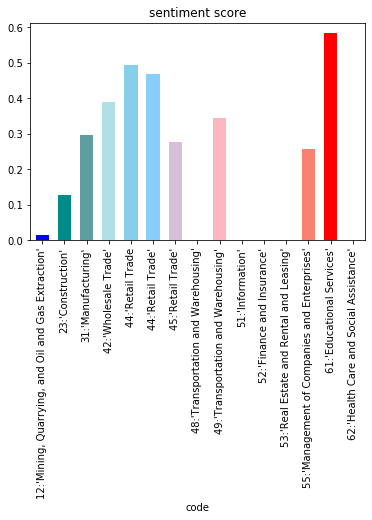

In [27]:
sentiment_scores(41051000502)

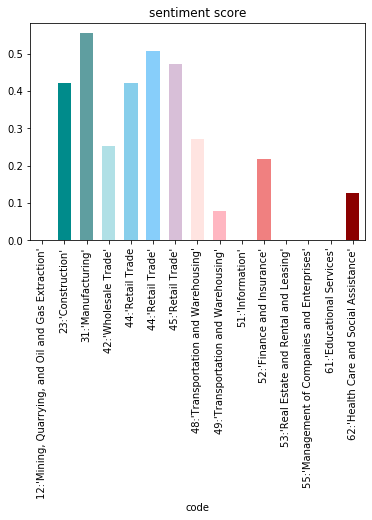

In [29]:
sentiment_scores(41051000401)

### Spatial Data visualization

In [30]:
import geopandas as gpd
import matplotlib.pylab as plt
import fiona
import descartes
from shapely.geometry import Point, Polygon
from shapely import wkt

In [31]:
#Get Porland Geoinformation
portland=pd.read_csv("Final_merged_city_portland.csv")
Portland=portland[portland['year']==2017]
P_Geo=Portland[['geo_id','geometry']]
P_Geo.head()


,geo_id,geometry
7,41051010402,MULTIPOLYGON (((-122.3868792758254 45.51902980...
15,41051010500,MULTIPOLYGON (((-122.3970989671113 45.57260058...
23,41051010500,MULTIPOLYGON (((-122.3970989671113 45.57260058...
31,41051009603,MULTIPOLYGON (((-122.4661255423961 45.53952849...
39,41051010100,MULTIPOLYGON (((-122.4566475168594 45.53948853...


/Users/yanxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yanxu/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:114: DeprecationWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  DeprecationWarning,


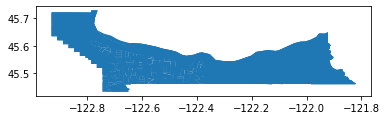

In [32]:
P_Geo['geometry'] = P_Geo['geometry'].apply(wkt.loads)
#crs = {'init':'epsg:4326'}
P_G = gpd.GeoDataFrame(P_Geo, geometry='geometry')
# Building the GeoDataframe 
crs = {'init':'epsg:4326'}
P_G = gpd.GeoDataFrame(P_G,crs=crs, geometry='geometry')
P_G .plot()

In [33]:
s=P_G.merge(s,on='geo_id')
s.head()

,geo_id,geometry,"12:'Mining, Quarrying, and Oil and Gas Extraction'",23:'Construction',31:'Manufacturing',42:'Wholesale Trade',44:'Retail Trade,44:'Retail Trade',45:'Retail Trade',48:'Transportation and Warehousing',49:'Transportation and Warehousing',51:'Information',52:'Finance and Insurance',53:'Real Estate and Rental and Leasing',55:'Management of Companies and Enterprises',61:'Educational Services',62:'Health Care and Social Assistance'
0,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.545367,0.0,0.0,0.0,0.0,-0.16982,0.0,0.0,0.0,0.0,0.5168,0.0,0.0,0.0000,0.0
1,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.545367,0.0,0.0,0.0,0.0,-0.16982,0.0,0.0,0.0,0.0,0.5168,0.0,0.0,0.0000,0.0
2,41051009603,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",0.545367,0.0,0.0,0.0,0.0,-0.16982,0.0,0.0,0.0,0.0,0.5168,0.0,0.0,0.0000,0.0
3,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.000000,0.0,0.0,0.0,0.0,0.40476,0.0,0.0,0.0,0.0,0.3081,0.0,0.0,0.4404,0.0
4,41051010100,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",0.000000,0.0,0.0,0.0,0.0,0.40476,0.0,0.0,0.0,0.0,0.3081,0.0,0.0,0.4404,0.0



                     Sentimentscore of different types of small businesses in each GeoId



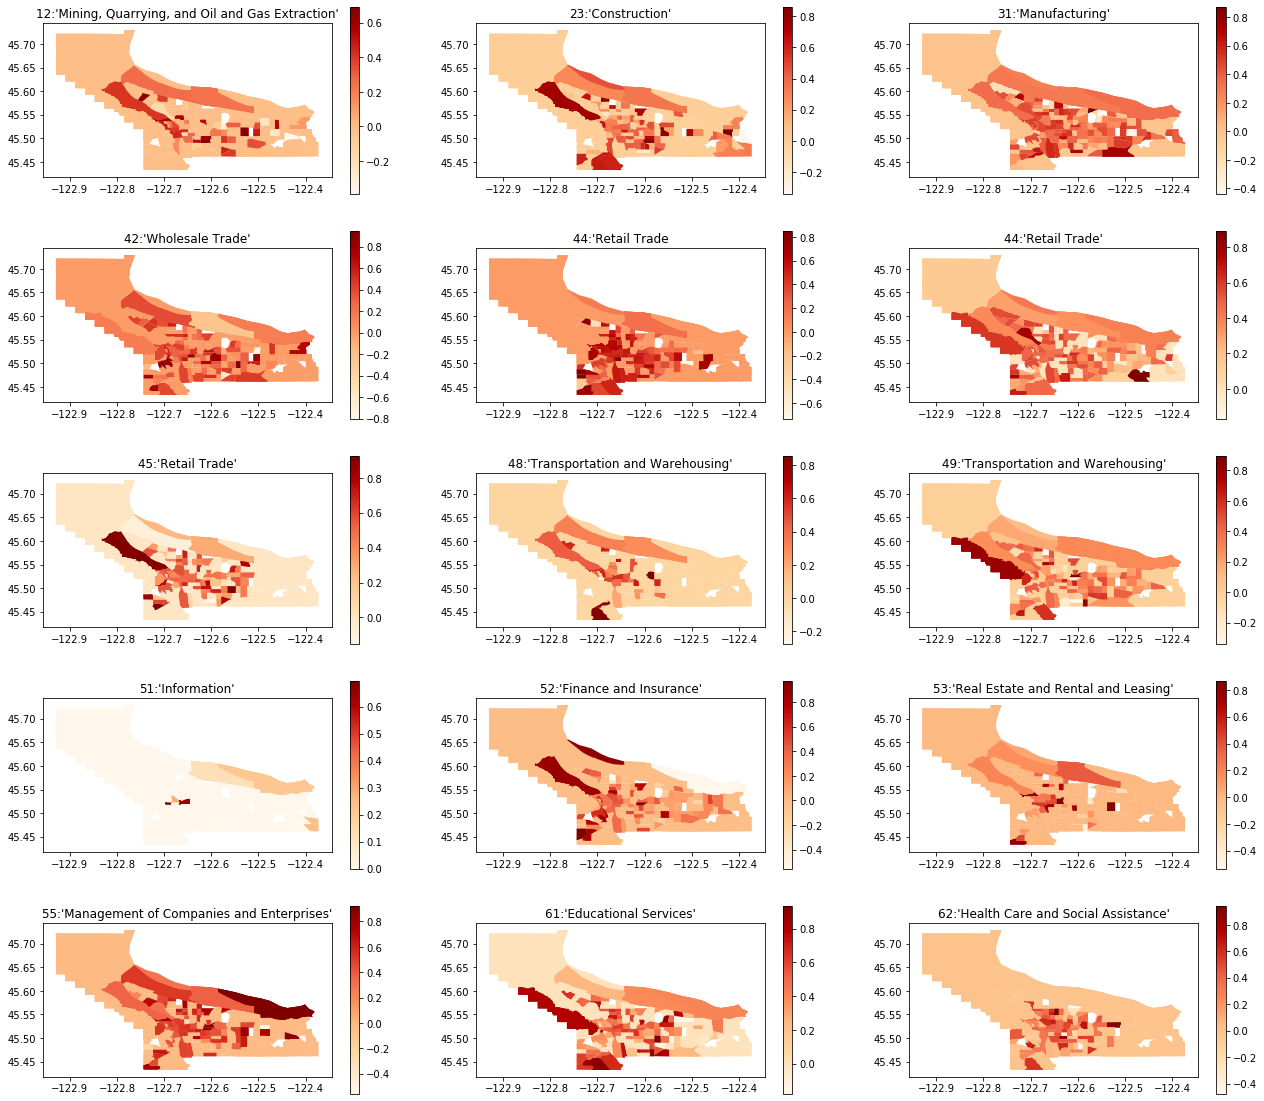

In [39]:
code=["12:'Mining, Quarrying, and Oil and Gas Extraction'",
 "23:'Construction'",
 "31:'Manufacturing'",
 "42:'Wholesale Trade'",
 "44:'Retail Trade",
 "44:'Retail Trade'",
 "45:'Retail Trade'",
 "48:'Transportation and Warehousing'",
 "49:'Transportation and Warehousing'",
 "51:'Information'",
 "52:'Finance and Insurance'",
 "53:'Real Estate and Rental and Leasing'",
 "55:'Management of Companies and Enterprises'",
 "61:'Educational Services'",
 "62:'Health Care and Social Assistance'"]

# [Education,Pets,car,hotel,Financial,Beauty,bicycles,shopping,Arts_Entertainment,
#        Nightlife,grocery,Home_Services,restaurant,Construction,Oil,healthcare,Information]
print()
print('                     Sentimentscore of different types of small businesses in each GeoId')
print()
f1, ax = plt.subplots(5,3, figsize=(22,20))
index = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(code[index], fontsize=12) 
        s.plot(ax=ax[i,j], column=code[index],cmap='OrRd',legend=True)
        index += 1
        if index >= 15:
            break
    if index >= 15:
        break
#f1.savefig('Distribution of different types.png', dpi=300)